In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
titanic_df = pd.read_csv('../data/train.csv')

In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic_df.shape

(891, 12)

In [16]:
#check for missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
titanic_df = titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


In [18]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
titanic_df.shape

(891, 8)

In [20]:
#checks or missing values
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [21]:
#fill the missing avlues with the mean value of age
titanic_df['Age'].mean()

29.69911764705882

In [23]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [24]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [25]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
titanic_df['Embarked'].mode()

0    S
dtype: object

In [29]:
titanic_df['Embarked'].mode()[0]

'S'

In [30]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [32]:
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
#Exploratory data analysis
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\ChizzyChops\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

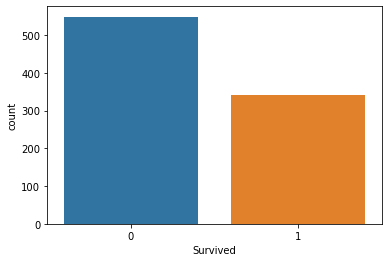

In [35]:
sns.countplot('Survived',data=titanic_df)

In [36]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\ChizzyChops\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

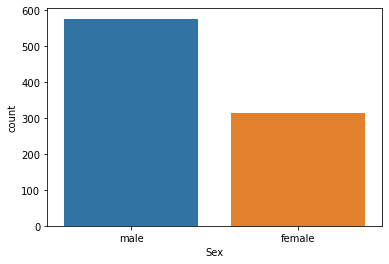

In [37]:
sns.countplot('Sex',data=titanic_df)

C:\Users\ChizzyChops\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

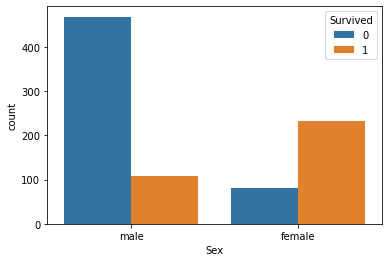

In [38]:
sns.countplot('Sex',hue='Survived',data=titanic_df)

In [39]:
titanic_df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

C:\Users\ChizzyChops\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

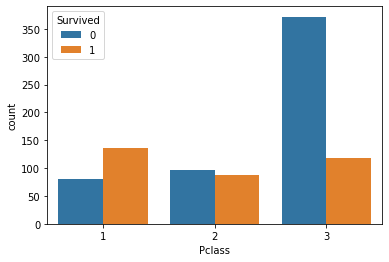

In [40]:
sns.countplot('Pclass',hue='Survived',data=titanic_df)

In [41]:
titanic_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:
#encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()

In [45]:
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])

In [46]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [47]:
embarked = pd.get_dummies(titanic_df['Embarked'])

In [48]:
embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [49]:
pclass = pd.get_dummies(titanic_df['Pclass'])

In [50]:
pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [51]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [52]:
titanic_df = pd.concat([pclass,embarked,titanic_df], axis=1)

In [53]:
titanic_df.head()

,1,2,3,C,Q,S,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,1,0,0,1,0,3,1,22.0,1,0,7.2500,S
1,1,0,0,1,0,0,1,1,0,38.0,1,0,71.2833,C
2,0,0,1,0,0,1,1,3,0,26.0,0,0,7.9250,S
3,1,0,0,0,0,1,1,1,0,35.0,1,0,53.1000,S
4,0,0,1,0,0,1,0,3,1,35.0,0,0,8.0500,S


In [54]:
titanic_df.drop(columns=['Pclass', 'Embarked',1, 'C'],axis=1, inplace=True)

In [55]:
titanic_df.head()

,2,3,Q,S,Survived,Sex,Age,SibSp,Parch,Fare
0,0,1,0,1,0,1,22.0,1,0,7.2500
1,0,0,0,0,1,0,38.0,1,0,71.2833
2,0,1,0,1,1,0,26.0,0,0,7.9250
3,0,0,0,1,1,0,35.0,1,0,53.1000
4,0,1,0,1,0,1,35.0,0,0,8.0500


In [56]:
x = titanic_df.drop(columns=['Survived'],axis=1)
y = titanic_df['Survived']

In [57]:
x.head()

,2,3,Q,S,Sex,Age,SibSp,Parch,Fare
0,0,1,0,1,1,22.0,1,0,7.2500
1,0,0,0,0,0,38.0,1,0,71.2833
2,0,1,0,1,0,26.0,0,0,7.9250
3,0,0,0,1,0,35.0,1,0,53.1000
4,0,1,0,1,1,35.0,0,0,8.0500


In [58]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [59]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8,random_state=2)

In [64]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, )

(712, 9) (179, 9) (712,) (179,)


In [65]:
#model training
from sklearn.linear_model import LogisticRegression

In [66]:
model =LogisticRegression()

In [67]:
#training the data
model.fit(x_train, y_train)

C:\Users\ChizzyChops\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_prediction = model.predict(x_test)

In [70]:
print(y_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test,y_prediction)

0.776536312849162

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
cm = confusion_matrix(y_test,y_prediction)

In [76]:
cm

array([[91,  9],
       [31, 48]], dtype=int64)

<AxesSubplot:>

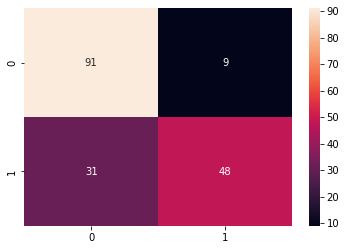

In [77]:
sns.heatmap(cm, annot=True)

In [79]:
#Assignment 1
from sklearn import metrics
performance_metrics = metrics.classification_report(y_test, y_prediction)

In [80]:
performance_metrics

'              precision    recall  f1-score   support\n\n           0       0.75      0.91      0.82       100\n           1       0.84      0.61      0.71        79\n\n    accuracy                           0.78       179\n   macro avg       0.79      0.76      0.76       179\nweighted avg       0.79      0.78      0.77       179\n'

In [96]:
from sklearn.metrics import f1_score, recall_score,precision_score

In [99]:
#f1 score
f1 = f1_score(y_test, y_prediction)
print(f'f1_score is {round((f1*100), 2)}%')

f1_score is 70.59%


In [100]:
#recall
recall = recall_score(y_test, y_prediction)
print(f'recall_score is {round((recall*100), 2)}%')

recall_score is 60.76%


In [101]:
#precision
precision = precision_score(y_test, y_prediction)
print(f'precision_score is {round((precision*100), 2)}%')

precision_score is 84.21%


In [81]:
conf_matrix = pd.crosstab(y_test, y_prediction,rownames=['Actual'], colnames=['Predicted'])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

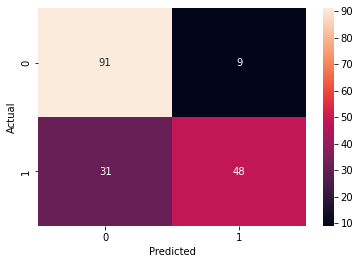

In [82]:
sns.heatmap(conf_matrix, annot=True)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

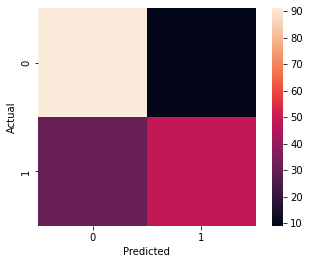

In [83]:
sns.heatmap(conf_matrix, square=True)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

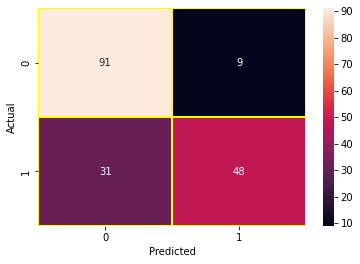

In [95]:
sns.heatmap(conf_matrix, annot=True, linewidths=2, linecolor="yellow", cbar=True)

In [ ]:
#Assignment:
Indicate which of the confusion matrix values is

TP=48     1,1

TN=91    0,0

FP=9     1,0

FN=31     0,1

Precision = TP / (TP + FP) = 48/(48+9) =0.84 or  84%
Recall = TP / (TP + FN) = 48/(48+31) = 0.61, or 61%


Use them to calculate the precision, recall

In [102]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.61      0.71        79

    accuracy                           0.78       179
   macro avg       0.79      0.76      0.76       179
weighted avg       0.79      0.78      0.77       179

